In [28]:
import japanize_matplotlib  # noqa
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["font.size"] = 25
plt.rcParams["xtick.labelsize"] = 25
plt.rcParams["ytick.labelsize"] = 25
plt.rcParams["axes.labelsize"] = 25
plt.rcParams["axes.titlesize"] = 30

METRICS_MAP = {
    "exec_time": "実行時間 (秒)",
    "exec_time_rate": "実行時間の比率",
    "user_util": "ユーザー満足度",
    "mean_max_envy": "Mean Max Envy",
    "pct_item_util_better": "% Items Better Off",
    "pct_item_util_worse": "% Items Worse Off",
}
METRICS = list(METRICS_MAP.keys())
METHOD_MAP = {
    "greedy": "Greedy",
    "expo_fair": "Exposure-Based",
    "nsw": "NSW",
    "greedy_nsw": "Greedy-NSW",
    "ot_nsw": "OT-NSW（Ours）",
}

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
registered_colors = {k: colors[i] for i, k in enumerate(METHOD_MAP.values())}
legend = list(registered_colors.keys())
palette = [registered_colors[method] for method in legend]

In [29]:
result_df = pd.read_csv("../output/result.csv").query('optimizer_params_method != "pg_ot"')
result_df["method"] = result_df["optimizer_name"].map(METHOD_MAP)
result_df["exec_time_rate"] = np.nan
ideal_df = result_df.query('method == "NSW"').reset_index(drop=True)
result_df = pd.merge(
    result_df[["generator_n_doc", "seed", "method"] + METRICS],
    ideal_df[["generator_n_doc", "seed"] + METRICS],
    on=["generator_n_doc", "seed"],
    suffixes=("", "_nsw"),
    how="left",
)

# nswの実行時間に対する比
result_df["exec_time_rate"] = result_df["exec_time"] / result_df["exec_time_nsw"]
result_df = result_df[result_df[METRICS].notna().all(axis=1)].reset_index(drop=True)

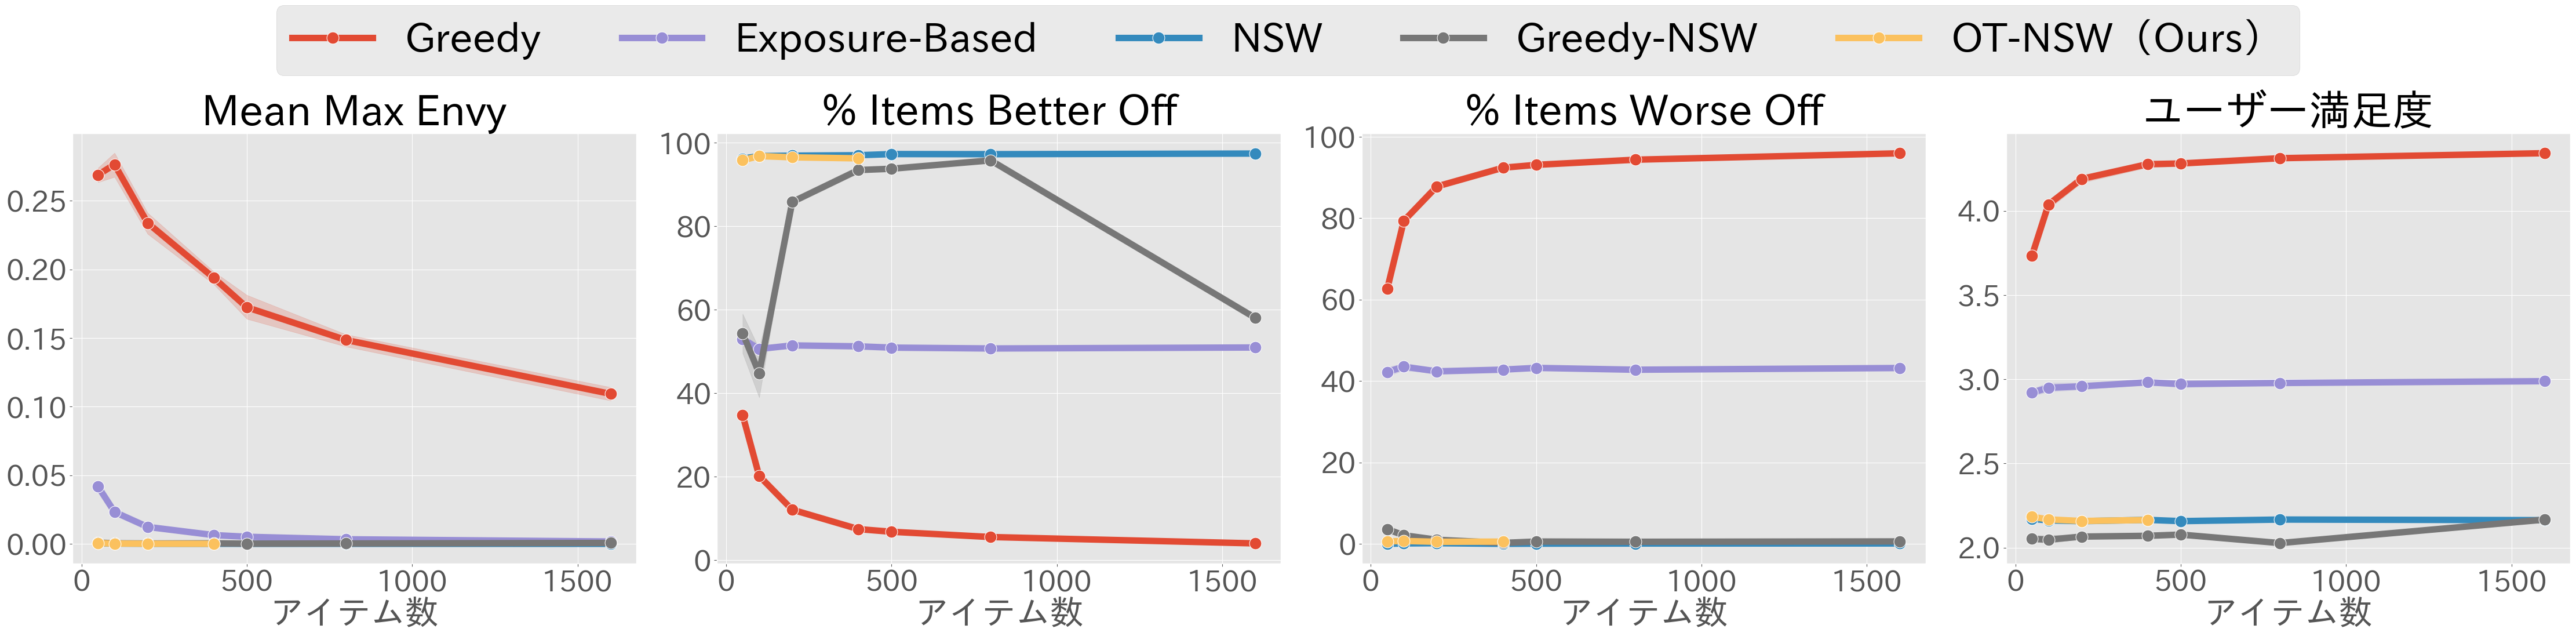

In [31]:
fig, axes = plt.subplots(ncols=4, figsize=(45, 10), tight_layout=True)
axes = np.ravel(axes)
for i, metric in enumerate(
    ["mean_max_envy", "pct_item_util_better", "pct_item_util_worse", "user_util"]
):
    ax = sns.lineplot(
        result_df,
        x="generator_n_doc",
        y=metric,
        hue="method",
        ax=axes[i],
        marker="o",
        markersize=15,
        markers=True,
        linewidth=8,
        legend=True,
        palette=palette,
    )
    ax.set_title(METRICS_MAP[metric], fontsize=52)
    ax.set_ylabel("")
    ax.set_xlabel("アイテム数", fontsize=42)
    ax.tick_params(axis="both", labelsize=35)

    handles, labels_unsorted = ax.get_legend_handles_labels()
    sorted_handles = [handles[labels_unsorted.index(method)] for method in legend]
    ax.get_legend().remove()

fig.legend(
    sorted_handles,
    legend,
    fontsize=50,
    bbox_to_anchor=(0.5, 1.15),
    ncol=len(legend),
    loc="upper center",
)

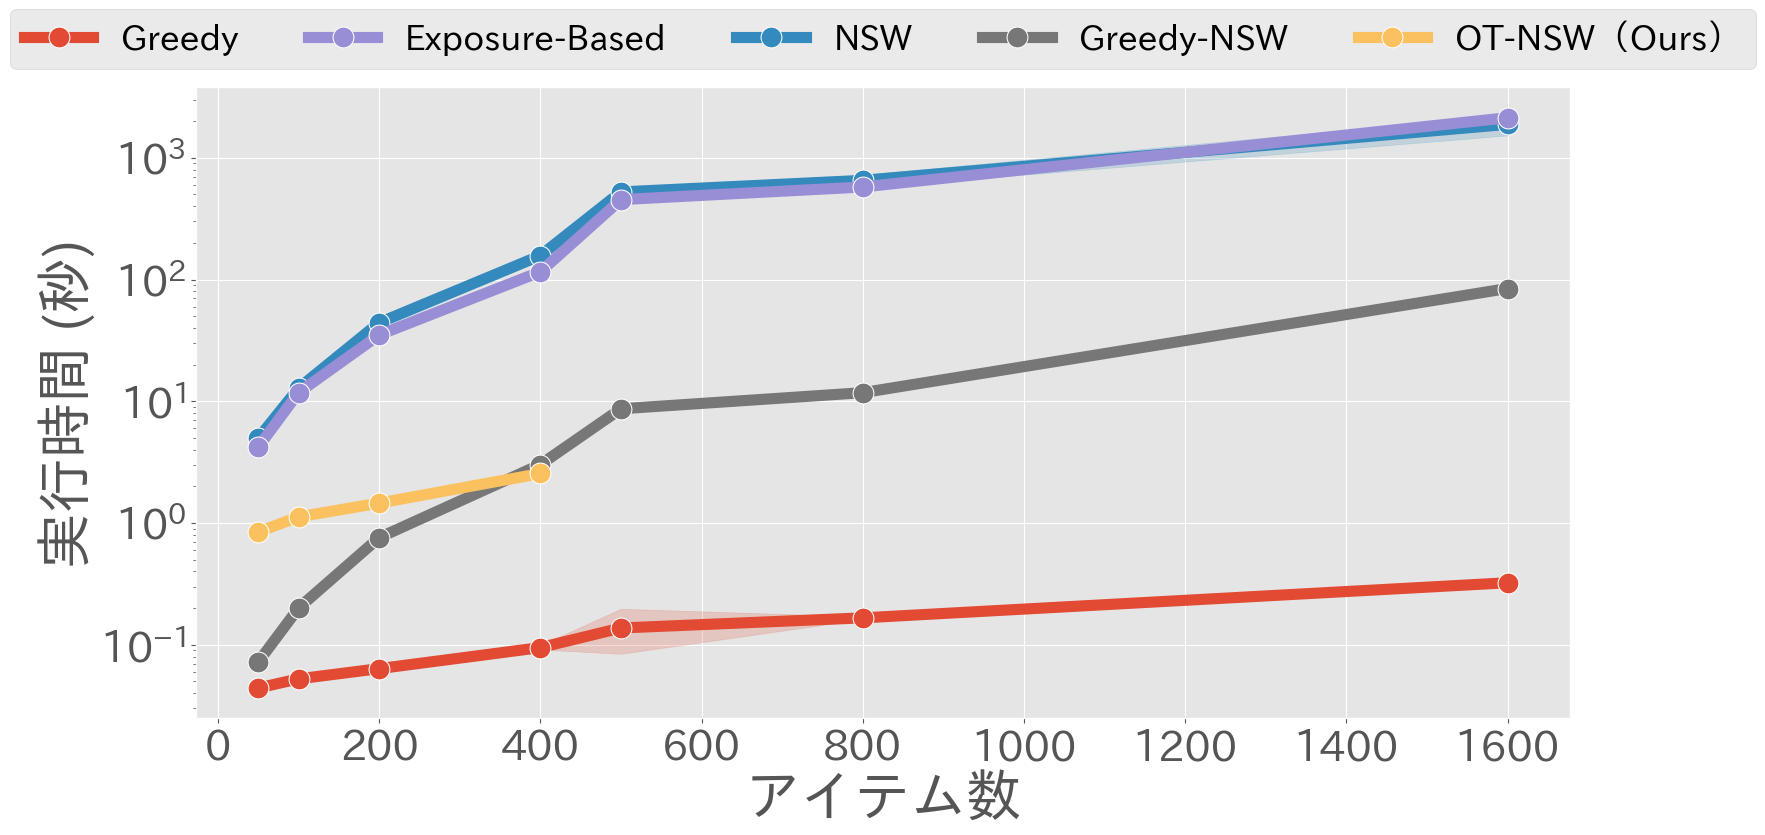

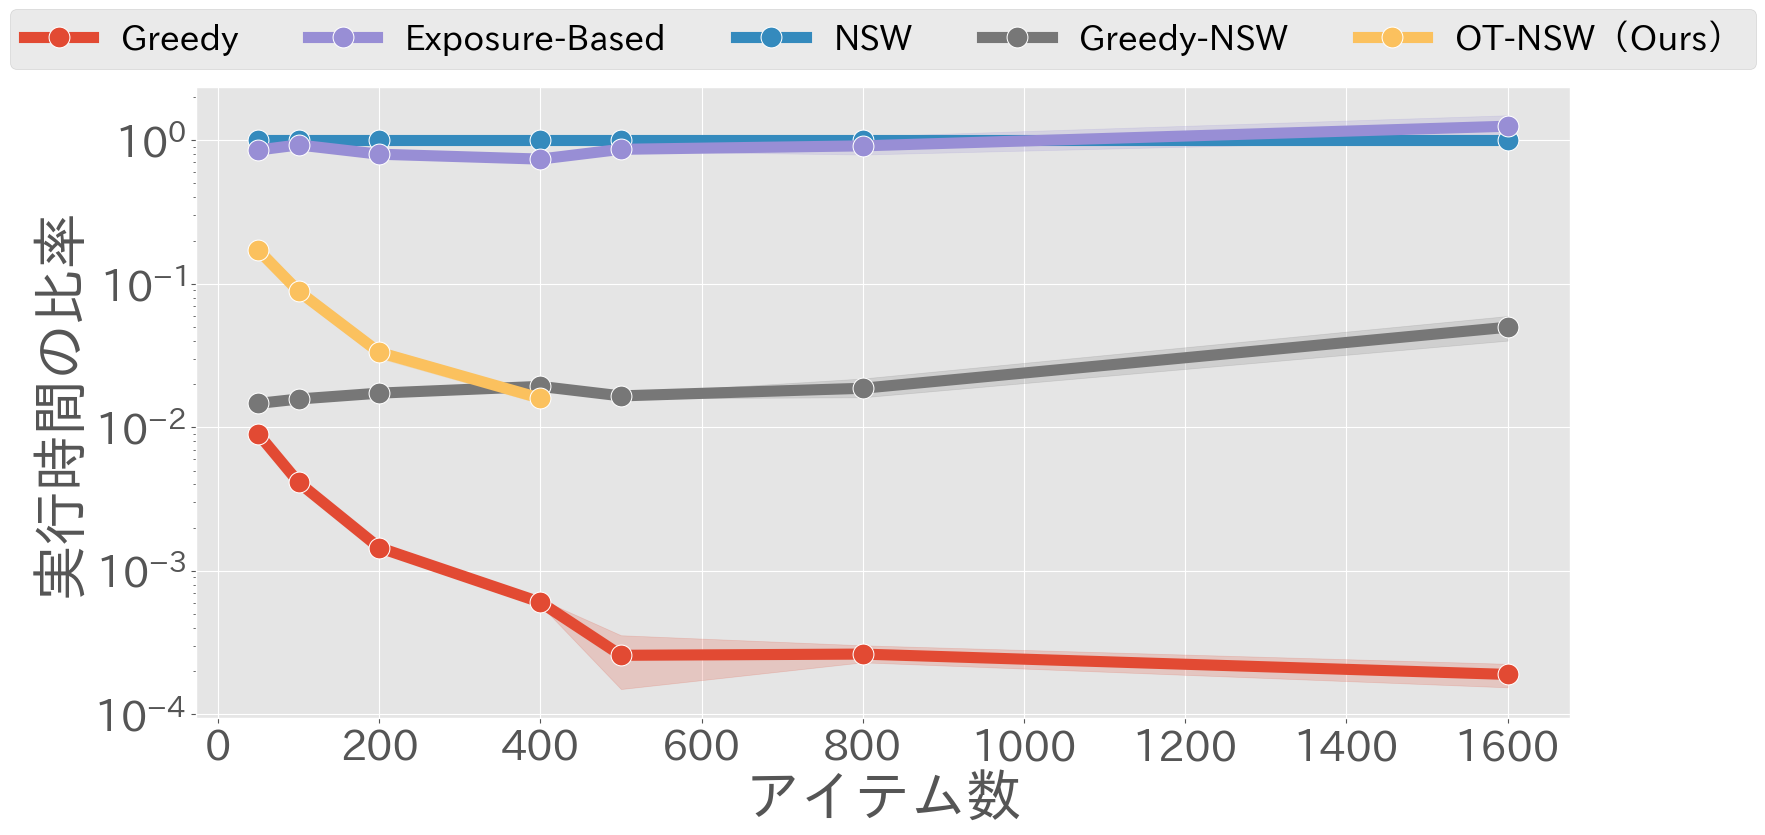

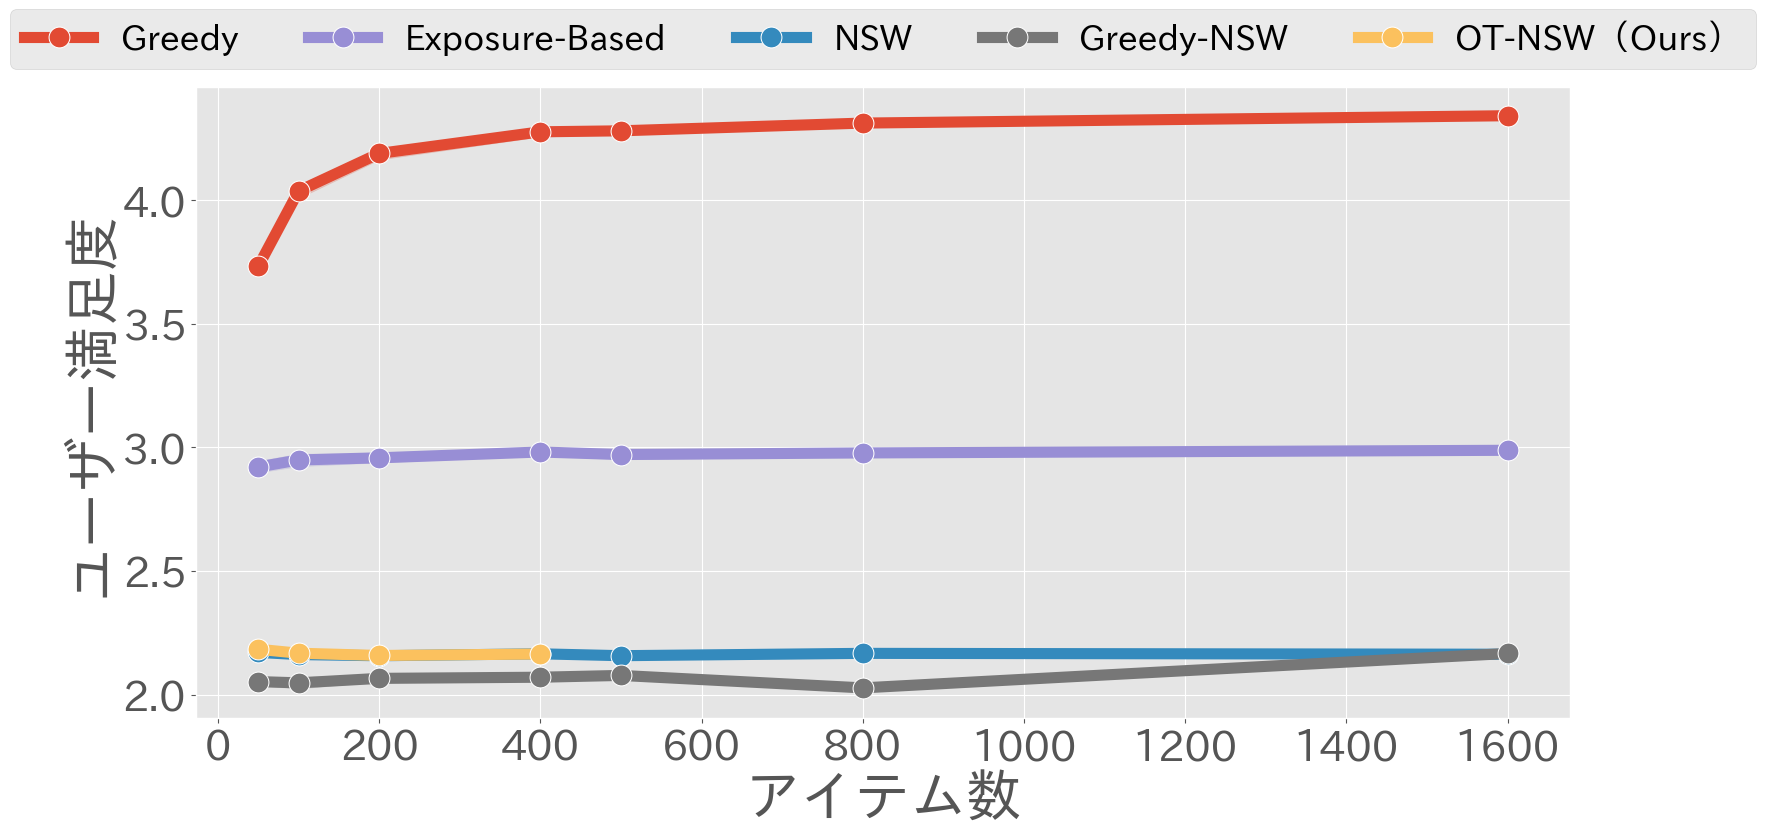

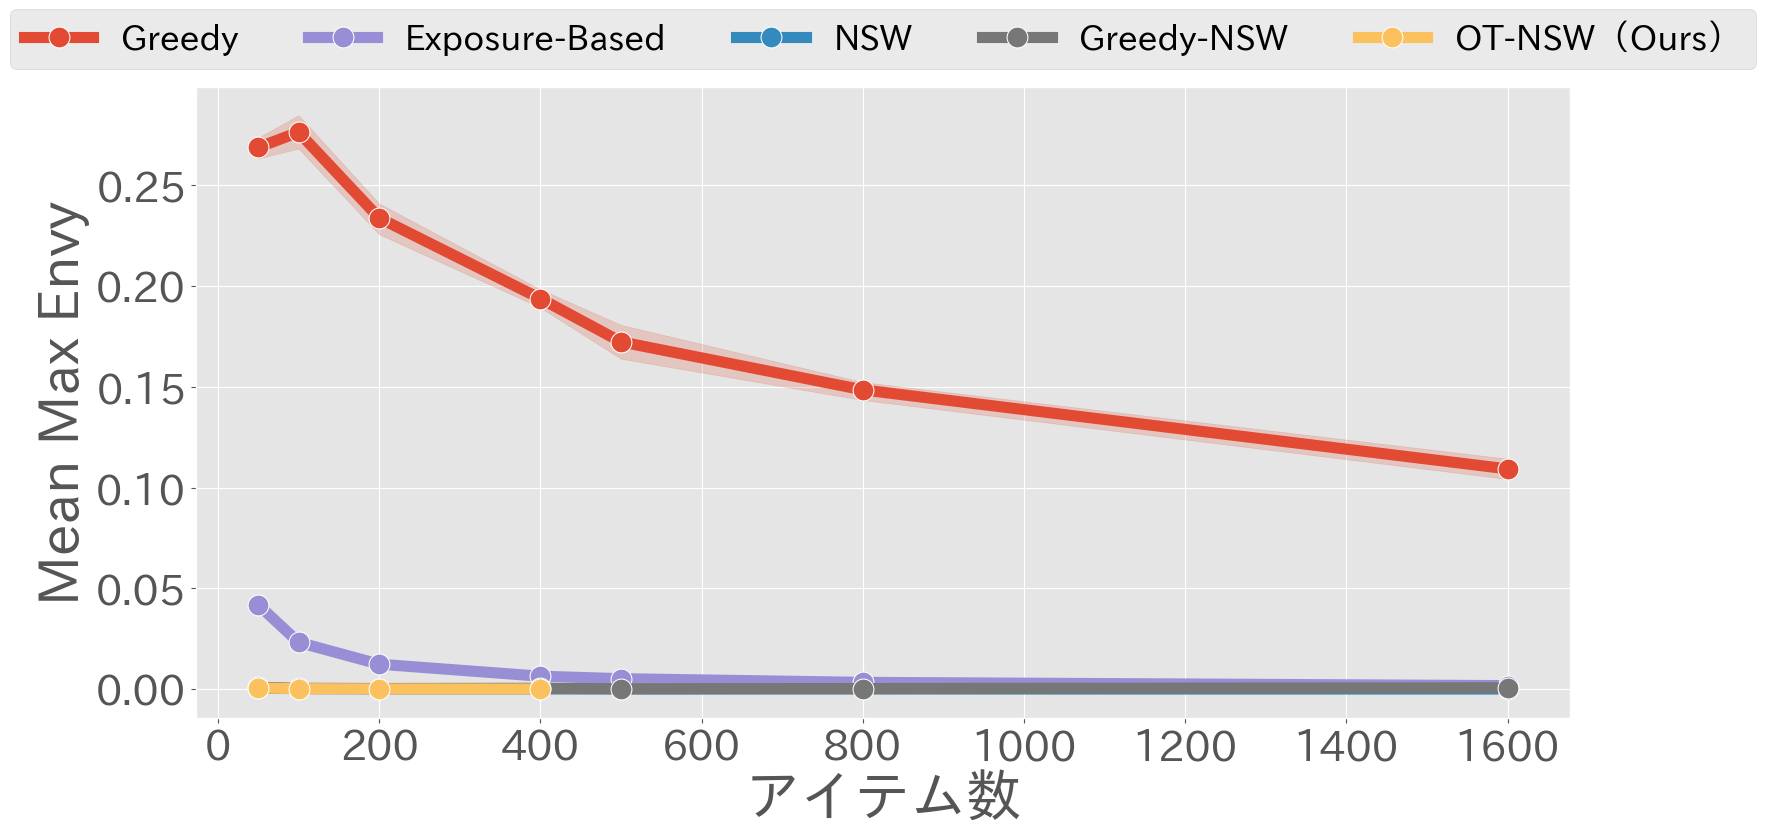

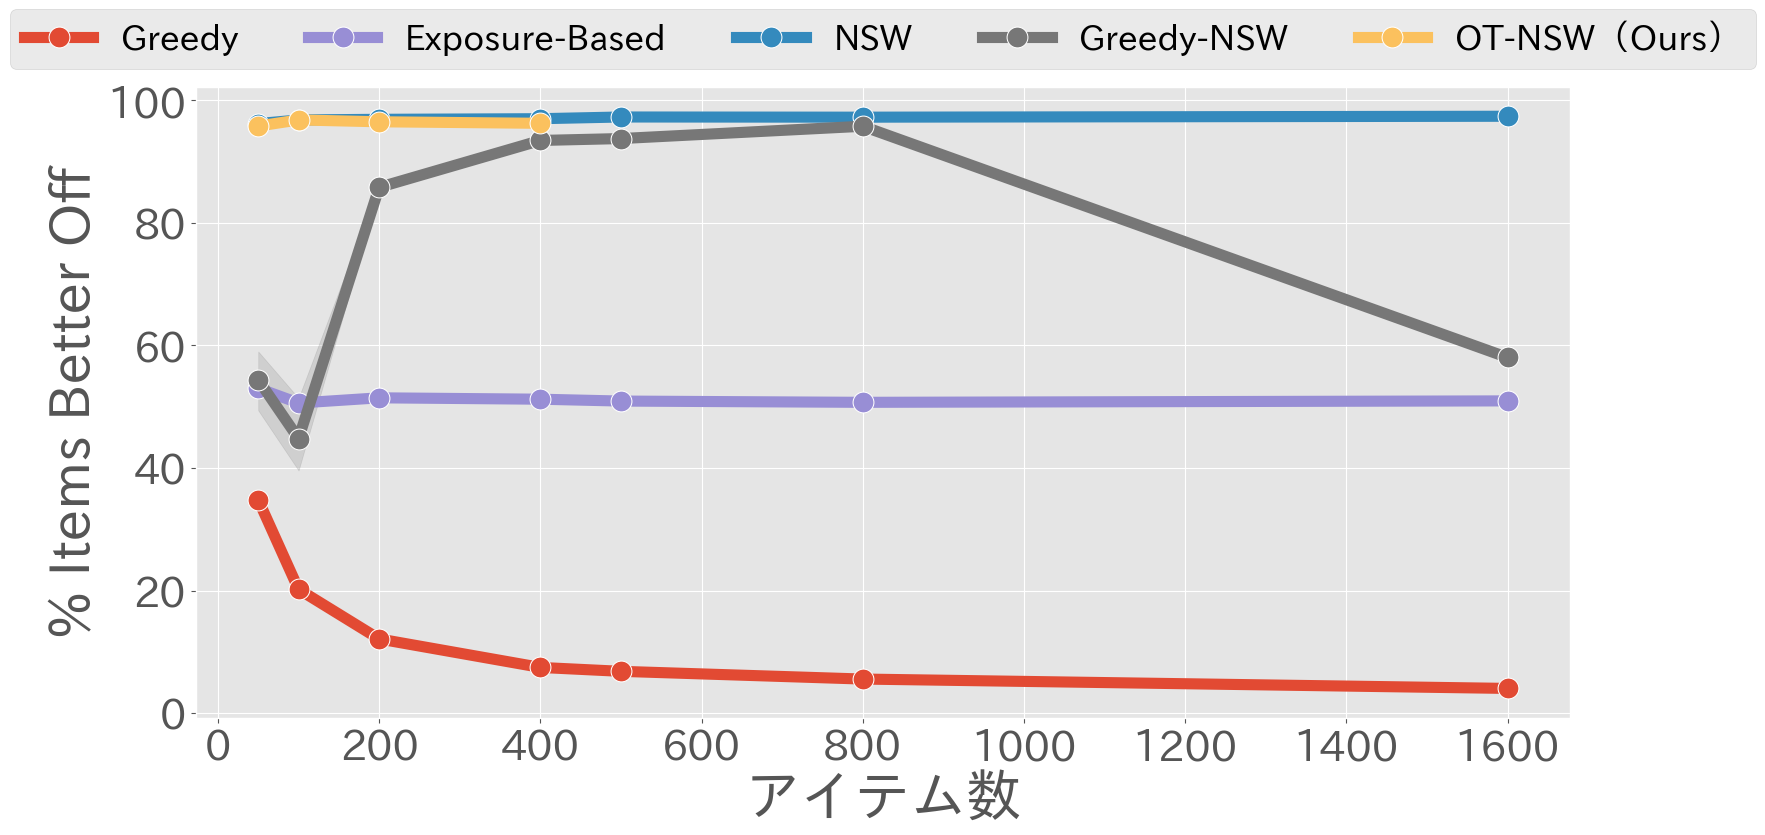

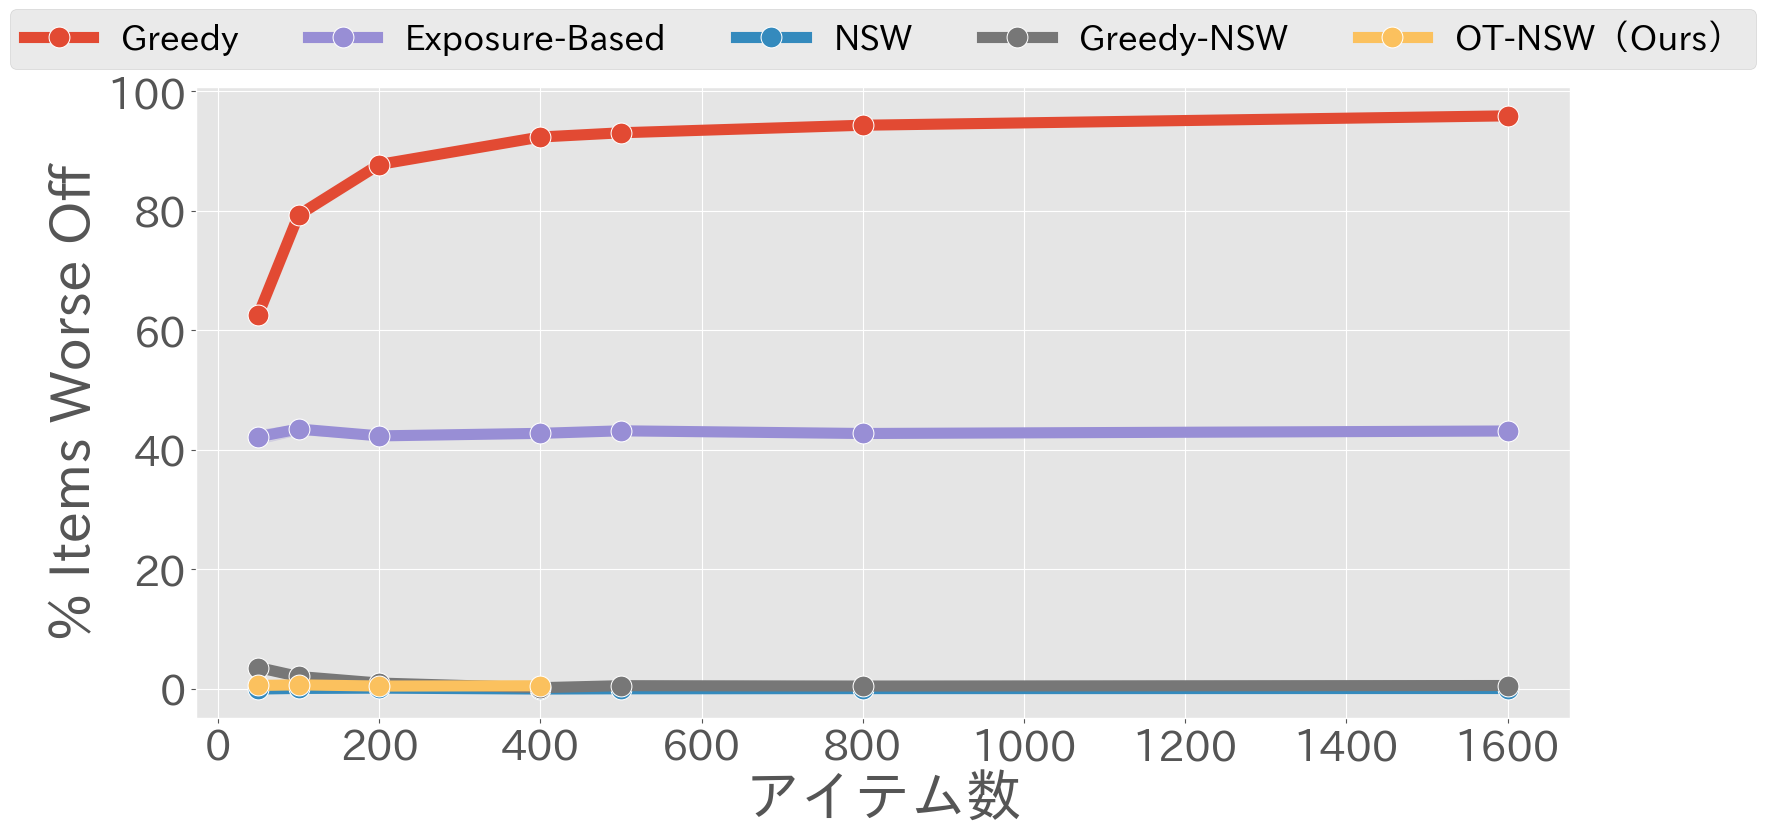

In [32]:
for i, metric in enumerate(METRICS):
    fig = plt.figure(figsize=(18, 9))
    ax = sns.lineplot(
        result_df,
        x="generator_n_doc",
        y=metric,
        hue="method",
        marker="o",
        markers=True,
        markersize=15,
        linewidth=8,
        legend=True,
        palette=palette,
    )
    # ax.set_title(METRICS_MAP[metric], fontsize=30)
    ax.set_ylabel(METRICS_MAP[metric], fontsize=40)
    ax.set_xlabel("アイテム数", fontsize=40)

    if metric in ["exec_time", "exec_time_rate"]:
        ax.set_yscale("log")

    # 凡例をlegendの順番に並べ替え
    handles, labels_unsorted = ax.get_legend_handles_labels()
    sorted_handles = [handles[labels_unsorted.index(method)] for method in legend]

    ax.legend(
        sorted_handles,
        legend,
        loc="upper center",
        ncol=len(legend),
        bbox_to_anchor=(0.5, 1.15),
        # fontsize=40,
    )
    ax.tick_params(axis="both", labelsize=30)

    fig.tight_layout()

In [9]:
from matplotlib import pyplot as plt

# 現在のカラーサイクルから色を取得
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# 色を表示
print("Color codes from the current color cycle:")
for color in colors:
    print(color)

Color codes from the current color cycle:
#E24A33
#348ABD
#988ED5
#777777
#FBC15E
#8EBA42
#FFB5B8
